# kNN k-Nearest Neighbors (Метод k-ближайших соседей)

Применение алгоритма kNN для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$.

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см
3. ширина лепестка, см

Метки классов

0. Setosa
1. Versicolour
2. Virginica

## 0. Импорт библиотек

In [1]:
# программная реализация алгоритма kNN для классификации
from sklearn.neighbors import KNeighborsClassifier
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

# библиотеки для работы с матрицами
import pandas as pd
import numpy as np

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [2]:
iris = datasets.load_iris()

> Что за тип данных `iris`?

In [6]:
# Выведите названия признаков
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Выведите данные по признакам
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
# Выведите информацию по целевой переменной (классам цветка)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
# Выведите информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print('Размерность признакового пространства {}'.format(iris.data.shape))
print('Размерность вектора целевой переменной {}'.format(iris.target.shape))

Размерность признакового пространства (150, 4)
Размерность вектора целевой переменной (150,)


In [11]:
# Вынесем признаки и целевую перемнную в отдельные переменные
tag = iris.data
target = iris.target

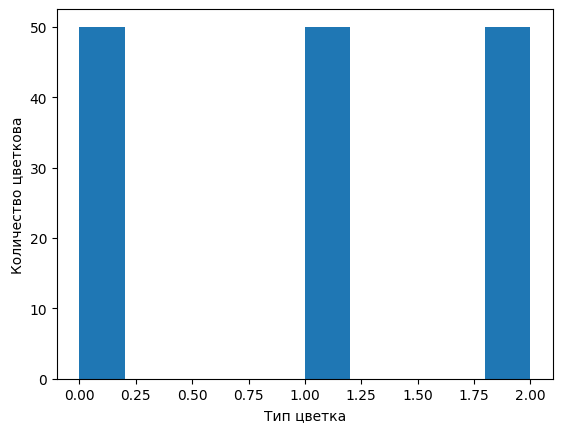

In [14]:
# Посмотрим на гистограмму распределения целевой переменной
# Убедитесь в сбалансированности классов
plt.hist(target)
plt.xlabel("Тип цветка")
plt.ylabel("Количество цветкова")
plt.show()

Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

> Выведите гистограммы для всех признаков X

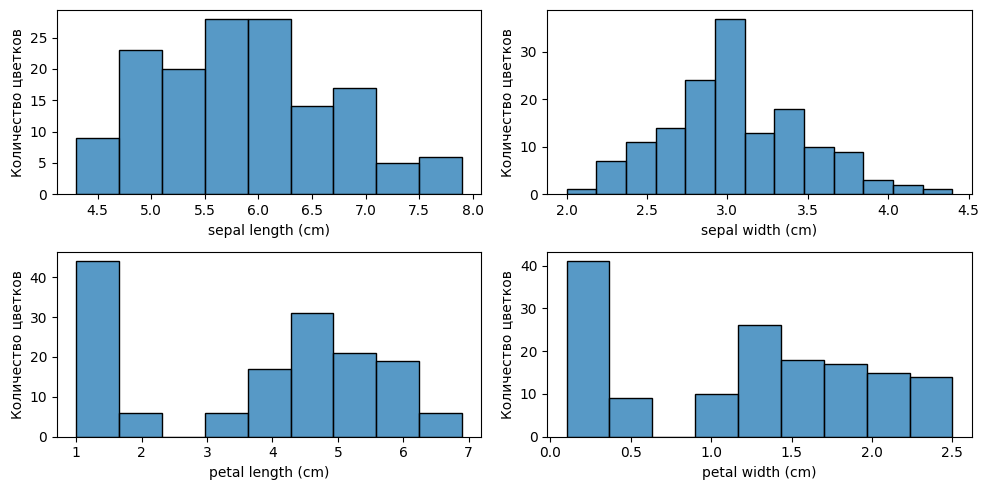

In [39]:
# type your code here
plt.figure(figsize=(10, 5))
for i in range(4):
  plt.subplot(2, 2, i + 1)

  sns.histplot(tag[:, i])
  plt.xlabel(iris.feature_names[i])
  plt.ylabel("Количество цветков")

plt.tight_layout()
plt.show()

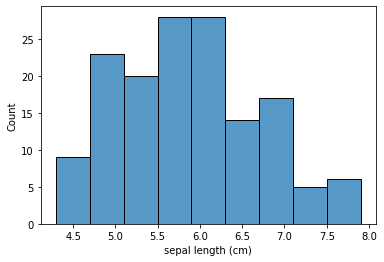

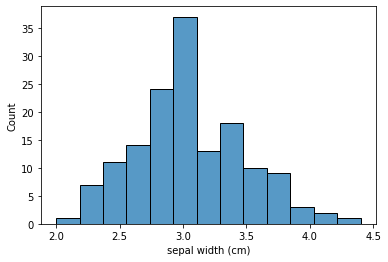

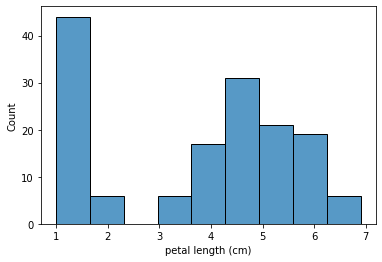

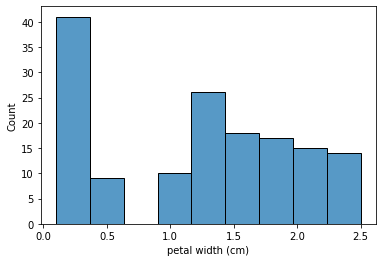

In [ ]:
# Пример результата

## 2. Визуально изобразим данные

Для отображения в двумерном пространстве выберем параметры `длина чашелистика, см` и `длина лепестка, см`

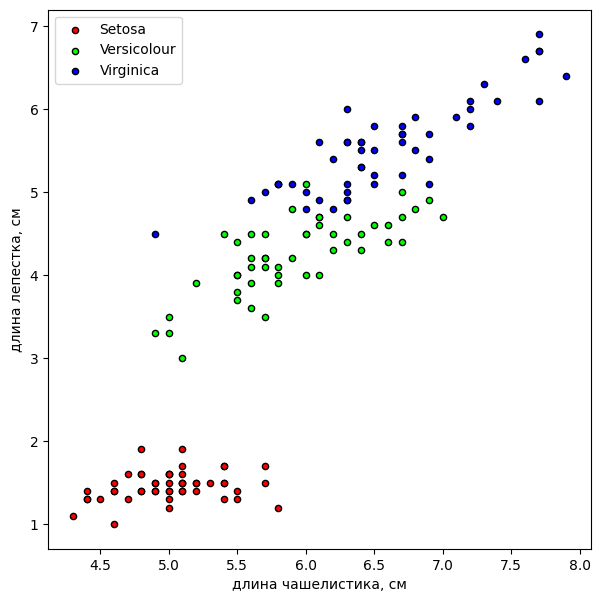

In [26]:
# список цветов для визуализации
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

# создадим полотно
fig, ax = plt.subplots(figsize=(7,7))
# отрисуем экземпляры
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = target==i
    ax.scatter(tag[idx,0], tag[idx,2],
               c=cmap_bold.colors[i], edgecolor='k',
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

> Создайте переменную `iris_df`, которая будет представлять собой DataFrame из всех X и целевой переменной

In [41]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

> При помощи `sns.pairplot` выведите диаграммы рассеивания для всех попарных комбинаций признаков

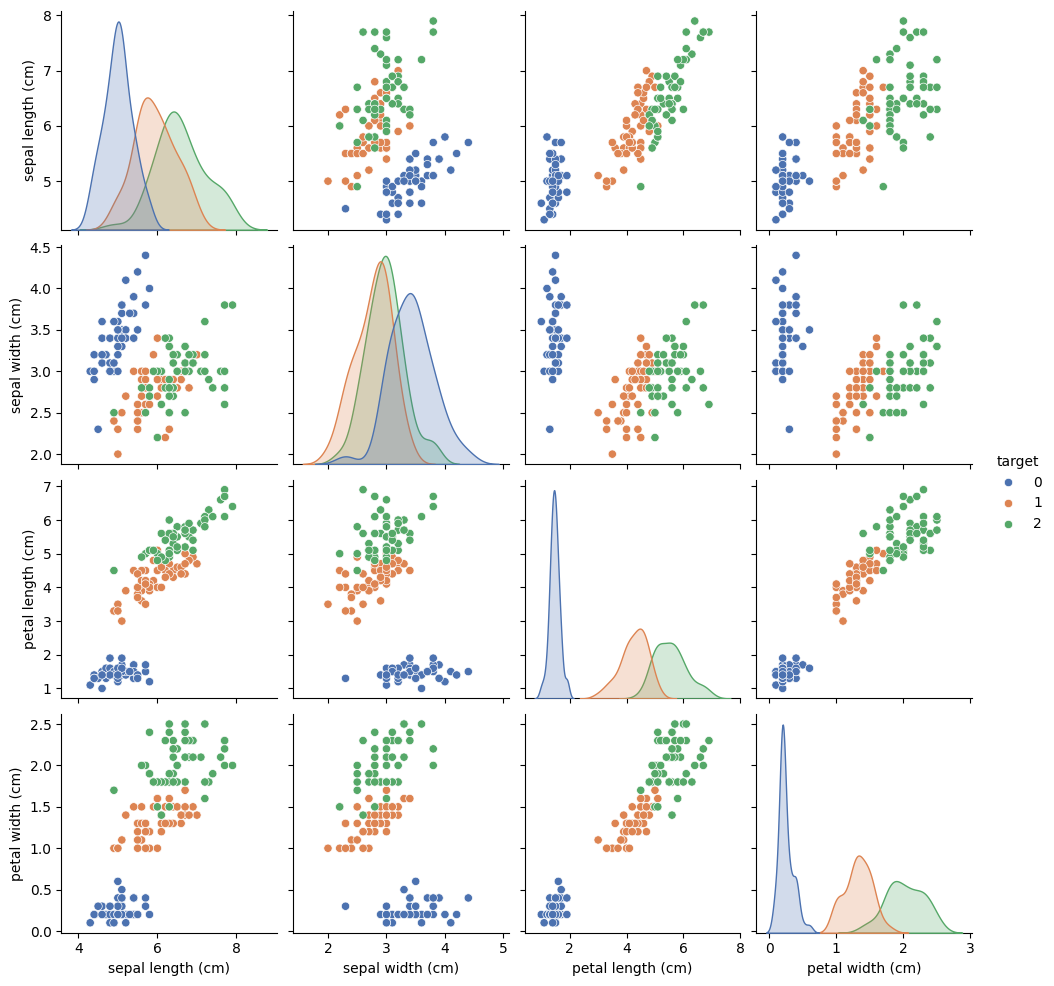

In [42]:
# type your code here
sns.pairplot(iris_df, hue='target', palette='deep')

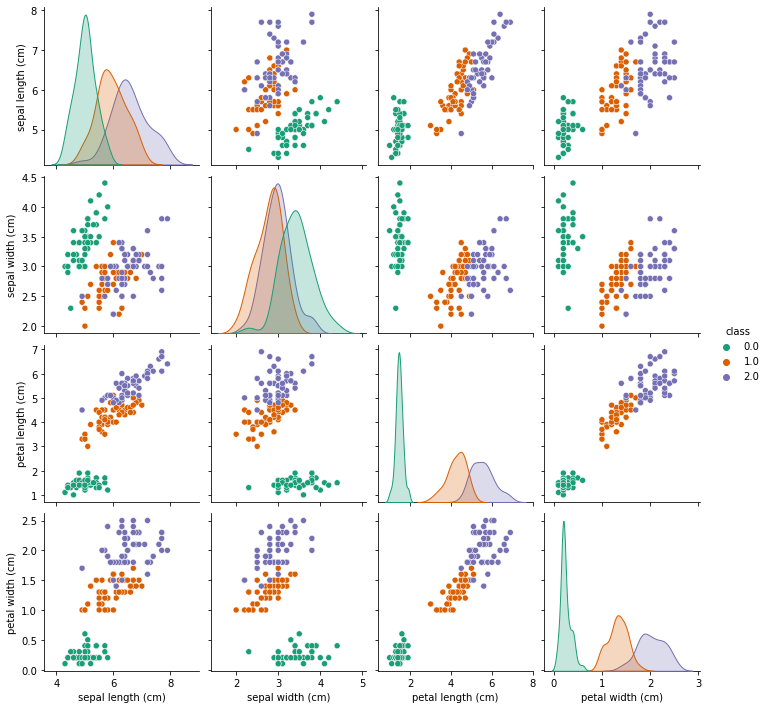

In [ ]:
# что должно получиться на выходе

### Посмотрим на `plotly.express`

In [43]:
px.histogram(data_frame=iris_df,x='sepal length (cm)',color='target')

In [32]:
df = px.data.iris()
fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.species, size=df.petal_length)
fig.show()

# 3. Обучение модели

Теперь давайте попробуем обучить модель, которая будет на основании параметров цветка, определять к какому сорту относится этот цветок.

## 3.1. Обучение на всех данных

In [44]:
# Создадим объект класса KNN с параметром n_neighbors=3
classifier_kNN = KNeighborsClassifier(n_neighbors=3)

# Обучение модели
X = tag
y = target
classifier_kNN.fit(X, y)

# Прогноз
y_pred = classifier_kNN.predict(X)

In [45]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y, y_pred)*100
print('Точность модели равна на всей выборке ' + str(round(accuracy, 2)) + ' %.')

Точность модели равна на всей выборке 96.0 %.


## 3.2. Разбиение выборки на train и test

Если мы будем оценивать качество модели на тех же данных, на которых обучали модель, как в примере выше, то будет происходить процесс заучивания ответов, а не поиска закономерностей в данных. В таком случае, модель не будет обладать обобщающей способностью и когда на вход прилетят новые данные, точность подобного прогноза будет сильно ниже, чем на данных, на которых модель обучалась.

В машинном обучении принято разделять данные на обучающую (**training set**) и тестовую (**test set**) выборки с тем, чтобы повысить обобщающую способность модели, т.е. способность делать прогнозы на данных, которые не участвовали при обучении.

Некоторым стандартом принято использовать разбиение 80 на 20, где 80% - размер обучающей выборки, 20% - размер тестовой выборки. Это не прибитые гвоздем значения, в зависимости от задачи они конечно могут меняться, но если нет никаких вводных по размерам этих групп, в первом приближении можно брать такое разбиение.

При разбиении важно учесть, чтобы и в тестовой и в обучающей выборках данные были распределены корректно. Стратификацию можно реализовать самостоятельно, но более оптимальным решением является использование готовой библиотеки `sklearn` и конкретно модулем `train_test_split`.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

> # Задание 1
>
> При помощи функции `mean()` посчитайте среднее значение для параметра **sepal length (cm)** (первый столбец в X) и введите в  поле ответа модуль разности между значениями для X_train и X_test (округлите до второго знака).

In [47]:
# type your code here
print(round(abs(X_train[:,0].mean()-X_test[:,0].mean()), 2))

0.12


А теперь приступим к обучению модели на новом разбиении данных

In [48]:
# Создадим объект класса KNN с параметром n_neighbors=5
classifier_kNN_robust = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающей выборке
classifier_kNN_robust.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred = classifier_kNN_robust.predict(X_test)

In [49]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(y_test, y_pred)*100
print('Точность модели на тестовой выборке равна ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке равна 96.67 %.


> # Задание 2
>
> Найдите оптимальное количество соседей для алгоритма в диапазоне [2;40]. Если для каких-то значений параметра `n_neighbours` будет одинаковая метрика accuracy, предпочтительнее брать модель с меньшим параметром. Ответ занесите в форму.

In [59]:
n_neighbours = range(2,41)
acc_list = []

for n_n in n_neighbours:
  model_KNN = KNeighborsClassifier(n_neighbors=n_n)
  model_KNN.fit(X_train, y_train)
  y_pred = model_KNN.predict(X_test)
  acc_list.append(accuracy_score(y_test, y_pred))


In [60]:
best_k = n_neighbours[acc_list.index(max(acc_list))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


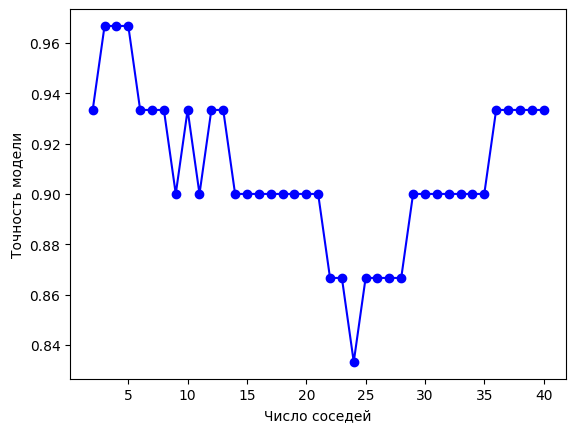

In [63]:
# plot acc_list
plt.plot(n_neighbours, acc_list, marker='o', color='b')
plt.xlabel("Число соседей")
plt.ylabel("Точность модели")
plt.show()

Из графика выше видно, что наибольшую точность модель достигает при числе соседей, равном 3.